In [1]:
import pandas as pd
import xlsxwriter

In [2]:
pd.__version__

'1.5.3'

In [25]:
data_df=pd.read_csv('Survey.csv')
data_df.columns = [x.lower().strip() for x in data_df.columns]

In [26]:
data_df.head(5)

,response_id,collection_date,urban_rural,education,income,vote_now,past_vote,cm_satisfaction,mla_satisfaction,age,gender,assembly_no,category,weight
0,1,8-24-2020,Rural,12th Pass,"? 30,000 - ? 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,8-24-2020,Rural,Graduate,"? 20,000 - ? 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,8-24-2020,Rural,Graduate,"? 5,000 - ? 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,8-24-2020,Urban,Graduate,"? 10,000 - ? 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,8-24-2020,Rural,Graduate,"? 50,000 - ? 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [27]:
data_df.set_index('response_id', inplace=True)

In [28]:
data_df.head(3)

,collection_date,urban_rural,education,income,vote_now,past_vote,cm_satisfaction,mla_satisfaction,age,gender,assembly_no,category,weight
response_id,,,,,,,,,,,,,
1,8-24-2020,Rural,12th Pass,"? 30,000 - ? 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
2,8-24-2020,Rural,Graduate,"? 20,000 - ? 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
3,8-24-2020,Rural,Graduate,"? 5,000 - ? 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762


In [29]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6867 entries, 1 to 6867
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   collection_date   6867 non-null   object 
 1   urban_rural       6867 non-null   object 
 2   education         6867 non-null   object 
 3   income            6867 non-null   object 
 4   vote_now          6867 non-null   object 
 5   past_vote         6867 non-null   object 
 6   cm_satisfaction   6867 non-null   object 
 7   mla_satisfaction  6867 non-null   object 
 8   age               6867 non-null   object 
 9   gender            6867 non-null   object 
 10  assembly_no       6867 non-null   int64  
 11  category          6867 non-null   object 
 12  weight            6867 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 751.1+ KB


In [8]:
data_df.describe()

,response_id,assembly_no,weight
count,6867.000000,6867.000000,6867.000000
mean,3434.000000,130.843017,0.995800
std,1982.476482,66.420060,2.074578
min,1.000000,1.000000,0.001089
25%,1717.500000,79.000000,0.137896
50%,3434.000000,135.000000,0.369789
75%,5150.500000,184.000000,0.956474
max,6867.000000,243.000000,51.075631


In [5]:
data_df['collection_date'].unique()

array(['8-24-2020', '8-25-2020', '8-26-2020', '8-27-2020', '8-28-2020',
       '8-29-2020', '8-30-2020', '8-31-2020', '9-1-2020'], dtype=object)

In [6]:
#this show the number of non unique value
data_df['collection_date'].nunique()

9

<Axes: xlabel='category'>

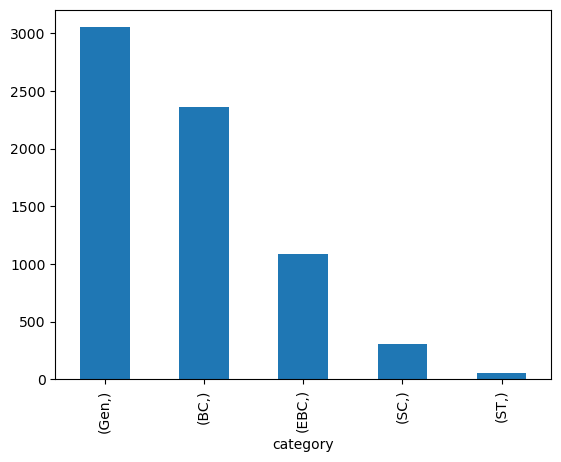

In [12]:
#this show the number of unique per date
data_df[['category']].value_counts().plot(kind='bar')

In [74]:
data_df['collection_date'].value_counts(ascending =True)

8-31-2020     557
8-30-2020     582
8-26-2020     598
9-1-2020      607
8-29-2020     620
8-27-2020     665
8-28-2020     761
8-25-2020     998
8-24-2020    1479
Name: collection_date, dtype: int64

In [75]:
data_df.head(2)

,response_id,collection_date,urban_rural,education,income,vote_now,past_vote,cm_satisfaction,mla_satisfaction,age,gender,assembly_no,category,weight
0,1,8-24-2020,Rural,12th Pass,"? 30,000 - ? 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,8-24-2020,Rural,Graduate,"? 20,000 - ? 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419


In [76]:
data_df.columns

Index(['response_id', 'collection_date', 'urban_rural', 'education', 'income',
       'vote_now', 'past_vote', 'cm_satisfaction', 'mla_satisfaction', 'age',
       'gender', 'assembly_no', 'category', 'weight'],
      dtype='object')

In [77]:
data_df['age'].isnull

<bound method Series.isnull of 0       26
1       34
2       25
3       36
4       22
        ..
6862    25
6863    30
6864    20
6865    23
6866    33
Name: age, Length: 6867, dtype: object>

In [31]:
data_df['age'].unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', '24ko', '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

In [32]:
data_df['age'].replace('24ko',24, inplace=True)

In [33]:
data_df['age'].unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', 24, '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

In [34]:
#this means there is object on data column age
data_df['age']

response_id
1       26
2       34
3       25
4       36
5       22
        ..
6863    25
6864    30
6865    20
6866    23
6867    33
Name: age, Length: 6867, dtype: object

In [38]:
#were have to convert it back to int
data_df.age.dtype

dtype('O')

In [39]:
#since the 24 we repalce is not recognize as int then we convert it
data_df['age']=data_df.age.astype(int)

In [40]:
data_df['age'].dtype

dtype('int32')

In [41]:
data_df.age.value_counts()

25    598
24    450
30    440
28    396
22    392
26    389
27    360
20    328
23    317
21    311
32    263
35    263
29    239
40    177
34    173
19    171
31    159
33    143
38    135
36    127
18    125
42    104
37     90
45     82
43     72
39     69
50     60
44     54
41     54
48     35
47     34
46     32
49     27
52     24
51     23
55     20
60     15
61     12
53     12
54     11
57     10
56      9
58      9
64      8
67      7
59      5
65      5
62      5
66      4
68      4
63      4
70      3
71      2
74      1
69      1
99      1
72      1
75      1
76      1
Name: age, dtype: int64

In [43]:
#then we re-run the question
len(data_df['age']<45)

6867

In [44]:
data_df['age'].describe()

count    6867.000000
mean       29.645260
std         8.717095
min        18.000000
25%        24.000000
50%        27.000000
75%        34.000000
max        99.000000
Name: age, dtype: float64

In [21]:
data_df

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,8-24-2020,Rural,12th Pass,"? 30,000 - ? 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,8-24-2020,Rural,Graduate,"? 20,000 - ? 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,8-24-2020,Rural,Graduate,"? 5,000 - ? 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,8-24-2020,Urban,Graduate,"? 10,000 - ? 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,8-24-2020,Rural,Graduate,"? 50,000 - ? 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,9-1-2020,Rural,10th Pass,"BPL/Below ? 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,9-1-2020,Rural,Graduate,"BPL/Below ? 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,9-1-2020,Urban,Graduate,"? 5,000 - ? 10,000",JAP(L),RJD,Cant say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,9-1-2020,Rural,Professional Education,"? 10,000 - ? 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


In [22]:
#to get the requere proposion
6867/6867*100

100.0

In [23]:
#copy data_df to datas
datas = data_df.copy()

In [24]:
#df_name.insert ('new_column', position, 'new_column name', 'new_column_values')   -to insert a new column and it values
datas.insert(10, 'age_group', data_df.age)

In [25]:
datas

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
0,1,8-24-2020,Rural,12th Pass,"? 30,000 - ? 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,26,Male,211,Gen,0.346969
1,2,8-24-2020,Rural,Graduate,"? 20,000 - ? 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,34,Male,189,BC,0.603419
2,3,8-24-2020,Rural,Graduate,"? 5,000 - ? 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,25,Male,191,Gen,0.673762
3,4,8-24-2020,Urban,Graduate,"? 10,000 - ? 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,36,Male,194,Gen,1.101298
4,5,8-24-2020,Rural,Graduate,"? 50,000 - ? 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,9-1-2020,Rural,10th Pass,"BPL/Below ? 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,25,Male,166,Gen,0.036329
6863,6864,9-1-2020,Rural,Graduate,"BPL/Below ? 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,30,Male,169,BC,0.252780
6864,6865,9-1-2020,Urban,Graduate,"? 5,000 - ? 10,000",JAP(L),RJD,Cant say,Fully Dissatisfied,20,20,Male,241,Gen,1.812926
6865,6866,9-1-2020,Rural,Professional Education,"? 10,000 - ? 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,23,Male,243,Gen,0.080137


In [26]:
#this is to group the age and as requere in the question 
#this group from the age of 18 and 25
data1=datas[(datas.age_group>=18)&(datas.age_group<25)]
data1.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,8-24-2020,Rural,Graduate,"? 50,000 - ? 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,22,Male,176,BC,0.333505
8,9,8-24-2020,Urban,12th Pass,"BPL/Below ? 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,23,Male,181,Gen,0.226477


In [27]:
data1

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,8-24-2020,Rural,Graduate,"? 50,000 - ? 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,22,Male,176,BC,0.333505
8,9,8-24-2020,Urban,12th Pass,"BPL/Below ? 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,23,Male,181,Gen,0.226477
14,15,8-24-2020,Rural,Graduate,"? 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,24,Male,199,Gen,0.226477
16,17,8-24-2020,Rural,Post - Graduation,"BPL/Below ? 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,24,Male,194,BC,0.769738
18,19,8-24-2020,Rural,Graduate,"? 30,000 - ? 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,23,Male,188,BC,0.040519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,6859,9-1-2020,Rural,Graduate,"? 10,000 - ? 20,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,24,24,Male,241,Gen,1.812926
6859,6860,9-1-2020,Urban,Post - Graduation,"? 5,000 - ? 10,000",Left Front,Did not vote,Fully Dissatisfied,Somewhat Satisfied,21,21,Male,146,EBC,1.558234
6861,6862,9-1-2020,Rural,Graduate,"BPL/Below ? 5,000",BJP,BJP,Fully Dissatisfied,Somewhat Satisfied,22,22,Male,166,Gen,0.080137
6864,6865,9-1-2020,Urban,Graduate,"? 5,000 - ? 10,000",JAP(L),RJD,Cant say,Fully Dissatisfied,20,20,Male,241,Gen,1.812926


In [28]:
data1.age_group.unique()

array([22, 23, 24, 19, 21, 18, 20])

In [29]:
#now we are to assige the value in to a column
data1['age_group']='18-25'

/tmp/ipykernel_210475/2422926686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['age_group']='18-25'


In [30]:
data1

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,8-24-2020,Rural,Graduate,"? 50,000 - ? 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,8-24-2020,Urban,12th Pass,"BPL/Below ? 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477
14,15,8-24-2020,Rural,Graduate,"? 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477
16,17,8-24-2020,Rural,Post - Graduation,"BPL/Below ? 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738
18,19,8-24-2020,Rural,Graduate,"? 30,000 - ? 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,6859,9-1-2020,Rural,Graduate,"? 10,000 - ? 20,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,24,18-25,Male,241,Gen,1.812926
6859,6860,9-1-2020,Urban,Post - Graduation,"? 5,000 - ? 10,000",Left Front,Did not vote,Fully Dissatisfied,Somewhat Satisfied,21,18-25,Male,146,EBC,1.558234
6861,6862,9-1-2020,Rural,Graduate,"BPL/Below ? 5,000",BJP,BJP,Fully Dissatisfied,Somewhat Satisfied,22,18-25,Male,166,Gen,0.080137
6864,6865,9-1-2020,Urban,Graduate,"? 5,000 - ? 10,000",JAP(L),RJD,Cant say,Fully Dissatisfied,20,18-25,Male,241,Gen,1.812926


In [31]:
data2=datas[(datas.age_group>=25)&(datas.age_group<40)]
data2.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
0,1,8-24-2020,Rural,12th Pass,"? 30,000 - ? 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,26,Male,211,Gen,0.346969
1,2,8-24-2020,Rural,Graduate,"? 20,000 - ? 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,34,Male,189,BC,0.603419


In [32]:
data2.age_group.unique()

array([26, 34, 25, 36, 38, 29, 30, 39, 37, 32, 27, 28, 35, 31, 33])

In [33]:
 data2['age_group'] = '25-40'

/tmp/ipykernel_210475/654463916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['age_group'] = '25-40'


In [34]:
data3=datas[(datas.age_group>=40)&(datas.age_group<50)]
data3.head(3)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
11,12,8-24-2020,Urban,Graduate,"? 10,000 - ? 20,000",LJP,JD(U),Somewhat Satisfied,Fully Dissatisfied,42,42,Male,183,BC,2.824391
28,29,8-24-2020,Rural,Graduate,"? 20,000 - ? 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,44,Male,205,BC,1.337935
30,31,8-24-2020,Urban,Graduate,"? 30,000 - ? 50,000",NOTA,NOTA,Fully Dissatisfied,Fully Dissatisfied,44,44,Male,183,Gen,1.344773


In [35]:
 data3.age_group.unique()

array([42, 44, 48, 45, 40, 49, 46, 43, 41, 47])

In [36]:
 data3['age_group'] = '40-55'

/tmp/ipykernel_210475/1226953827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['age_group'] = '40-55'


In [37]:
data4=datas[datas.age_group>=55]
data4.head(3)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
69,70,8-24-2020,Rural,Graduate,"? 30,000 - ? 50,000",RJD,INC,Fully Dissatisfied,Fully Satisfied,74,74,Male,192,ST,1.805903
74,75,8-24-2020,Urban,Graduate,"? 30,000 - ? 50,000",BJP,BJP,Somewhat Dissatisfied,Somewhat Satisfied,70,70,Male,183,BC,0.343147
121,122,8-24-2020,Rural,Graduate,"? 20,000 - ? 30,000",NOTA,Did not vote,Somewhat Satisfied,Fully Dissatisfied,58,58,Male,187,Gen,2.092567


In [38]:
data4['age_group']='55+'

/tmp/ipykernel_210475/3737724322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['age_group']='55+'


In [39]:
data4

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
69,70,8-24-2020,Rural,Graduate,"? 30,000 - ? 50,000",RJD,INC,Fully Dissatisfied,Fully Satisfied,74,55+,Male,192,ST,1.805903
74,75,8-24-2020,Urban,Graduate,"? 30,000 - ? 50,000",BJP,BJP,Somewhat Dissatisfied,Somewhat Satisfied,70,55+,Male,183,BC,0.343147
121,122,8-24-2020,Rural,Graduate,"? 20,000 - ? 30,000",NOTA,Did not vote,Somewhat Satisfied,Fully Dissatisfied,58,55+,Male,187,Gen,2.092567
126,127,8-24-2020,Urban,Graduate,"? 80,000 - ? 1,50,000",NOTA,BJP,Fully Dissatisfied,Fully Dissatisfied,56,55+,Male,183,Gen,2.092567
183,184,8-24-2020,Rural,Graduate,"? 1,50,000 & above",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,55,55+,Male,175,BC,2.824391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6649,6650,8-30-2020,Urban,Graduate,"? 30,000 - ? 50,000",Left Front,INC,Somewhat Dissatisfied,Somewhat Satisfied,55,55+,Male,146,Gen,3.090009
6702,6703,8-31-2020,Urban,Professional Education,"? 10,000 - ? 20,000",BJP,BJP,Somewhat Dissatisfied,Fully Dissatisfied,68,55+,Male,146,Gen,0.710519
6720,6721,8-31-2020,Rural,Graduate,"? 10,000 - ? 20,000",BJP,BJP,Somewhat Satisfied,Fully Satisfied,76,55+,Male,168,Gen,1.535906
6787,6788,9-1-2020,Rural,10th Pass,"? 20,000 - ? 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,55+,Male,144,SC,4.741094


In [40]:
#to put he own data in to a dataframe
data_df=pd.concat([data1,data2,data3,data4])
data_df

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,8-24-2020,Rural,Graduate,"? 50,000 - ? 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,8-24-2020,Urban,12th Pass,"BPL/Below ? 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477
14,15,8-24-2020,Rural,Graduate,"? 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477
16,17,8-24-2020,Rural,Post - Graduation,"BPL/Below ? 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738
18,19,8-24-2020,Rural,Graduate,"? 30,000 - ? 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6649,6650,8-30-2020,Urban,Graduate,"? 30,000 - ? 50,000",Left Front,INC,Somewhat Dissatisfied,Somewhat Satisfied,55,55+,Male,146,Gen,3.090009
6702,6703,8-31-2020,Urban,Professional Education,"? 10,000 - ? 20,000",BJP,BJP,Somewhat Dissatisfied,Fully Dissatisfied,68,55+,Male,146,Gen,0.710519
6720,6721,8-31-2020,Rural,Graduate,"? 10,000 - ? 20,000",BJP,BJP,Somewhat Satisfied,Fully Satisfied,76,55+,Male,168,Gen,1.535906
6787,6788,9-1-2020,Rural,10th Pass,"? 20,000 - ? 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,55+,Male,144,SC,4.741094


In [41]:
data_df.age_group.unique()

array(['18-25', '25-40', '40-55', '55+'], dtype=object)

In [75]:
data_df.head(3)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,8-24-2020,Rural,Graduate,"? 50,000 - ? 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,8-24-2020,Urban,12th Pass,"BPL/Below ? 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477
14,15,8-24-2020,Rural,Graduate,"? 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477


In [76]:
data_df.age_group.value_counts()

25-40    3844
18-25    2094
40-55     671
55+       128
Name: age_group, dtype: int64

In [77]:
data_df.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,8-24-2020,Rural,Graduate,"? 50,000 - ? 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,8-24-2020,Urban,12th Pass,"BPL/Below ? 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477


In [78]:
#we have to select RJD from the colum vote_now
data_df['Vote_Now'].unique()

array(['JD(U)', 'BJP', 'RJD', 'JAP(L)', 'Others', 'NOTA', 'Plurals',
       'BSP', 'RJJP', 'AAP', 'INC', 'LJP', 'RLSP', 'HAM', 'Undecided',
       'VIP', 'Left Front', 'AIMIM'], dtype=object)

In [79]:

data_df.Past_Vote.unique()

array(['Did not vote', 'BJP', 'RJD', 'JD(U)', 'VIP', 'NOTA', 'Others',
       'INC', 'LJP', 'HAM', 'BSP', 'Left Front', 'JAP(L)', 'RLSP'],
      dtype=object)

In [80]:
data_df[data_df['Vote_Now']=='RJD']
data_df[data_df['Past_Vote']=='RJD']

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
16,17,8-24-2020,Rural,Post - Graduation,"BPL/Below ? 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738
38,39,8-24-2020,Urban,Graduate,"BPL/Below ? 5,000",RJD,RJD,Cant say,Cant say,22,18-25,Male,181,SC,1.596987
47,48,8-24-2020,Urban,Graduate,"BPL/Below ? 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,20,18-25,Male,172,BC,1.188838
85,86,8-24-2020,Rural,12th Pass,"BPL/Below ? 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,22,18-25,Male,187,BC,0.586158
120,121,8-24-2020,Rural,Graduate,"? 1,50,000 & above",RJD,RJD,Fully Satisfied,Fully Satisfied,23,18-25,Male,187,BC,0.891022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5493,5494,8-26-2020,Urban,Graduate,"? 30,000 - ? 50,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,61,55+,Male,156,Gen,1.044473
5687,5688,8-29-2020,Urban,Graduate,"? 10,000 - ? 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,62,55+,Male,156,EBC,10.814150
5700,5701,8-29-2020,Urban,Graduate,"? 20,000 - ? 30,000",INC,RJD,Somewhat Satisfied,Fully Dissatisfied,60,55+,Male,63,Gen,2.001044
5830,5831,8-30-2020,Urban,Graduate,"? 50,000 - ? 80,000",RJD,RJD,Somewhat Dissatisfied,Fully Dissatisfied,59,55+,Male,48,Gen,2.359308


In [81]:
data_df[(data_df['Vote_Now']=='RJD') & (data_df['Past_Vote']=='RJD')]

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
16,17,8-24-2020,Rural,Post - Graduation,"BPL/Below ? 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738
38,39,8-24-2020,Urban,Graduate,"BPL/Below ? 5,000",RJD,RJD,Cant say,Cant say,22,18-25,Male,181,SC,1.596987
47,48,8-24-2020,Urban,Graduate,"BPL/Below ? 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,20,18-25,Male,172,BC,1.188838
85,86,8-24-2020,Rural,12th Pass,"BPL/Below ? 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,22,18-25,Male,187,BC,0.586158
120,121,8-24-2020,Rural,Graduate,"? 1,50,000 & above",RJD,RJD,Fully Satisfied,Fully Satisfied,23,18-25,Male,187,BC,0.891022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,4754,8-26-2020,Rural,Post - Graduation,"? 30,000 - ? 50,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,61,55+,Male,16,BC,4.650280
5493,5494,8-26-2020,Urban,Graduate,"? 30,000 - ? 50,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,61,55+,Male,156,Gen,1.044473
5687,5688,8-29-2020,Urban,Graduate,"? 10,000 - ? 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,62,55+,Male,156,EBC,10.814150
5830,5831,8-30-2020,Urban,Graduate,"? 50,000 - ? 80,000",RJD,RJD,Somewhat Dissatisfied,Fully Dissatisfied,59,55+,Male,48,Gen,2.359308


In [82]:
#to find the proportion we have to divide the number of RJD responde with the number of all respond 
801/6867*100

11.66448230668414

In [50]:
data_df.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,8-24-2020,Rural,Graduate,"? 50,000 - ? 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,8-24-2020,Urban,12th Pass,"BPL/Below ? 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477


In [51]:
data_df['CM_satisfaction'].unique()

array(['Fully Satisfied', 'Fully Dissatisfied', 'Somewhat Dissatisfied',
       'Cant say', 'Somewhat Satisfied'], dtype=object)

In [52]:
cm=data_df[data_df['CM_satisfaction']=='Fully Satisfied']
cm.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,8-24-2020,Rural,Graduate,"? 50,000 - ? 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,8-24-2020,Urban,12th Pass,"BPL/Below ? 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477


In [53]:
a=cm.collection_date.value_counts()
a

8-24-2020    141
8-25-2020     91
8-28-2020     90
8-29-2020     72
9-1-2020      72
8-30-2020     64
8-31-2020     62
8-26-2020     58
8-27-2020     51
Name: collection_date, dtype: int64

In [54]:
b=data_df.collection_date.value_counts()
b

8-24-2020    1440
8-25-2020     979
8-28-2020     746
8-27-2020     652
8-29-2020     612
9-1-2020      594
8-26-2020     589
8-30-2020     572
8-31-2020     553
Name: collection_date, dtype: int64

In [55]:
#proportion
c=a/b*100
c

8-24-2020     9.791667
8-25-2020     9.295199
8-26-2020     9.847199
8-27-2020     7.822086
8-28-2020    12.064343
8-29-2020    11.764706
8-30-2020    11.188811
8-31-2020    11.211573
9-1-2020     12.121212
Name: collection_date, dtype: float64

In [45]:
data_df.head(2)

,collection_date,urban_rural,education,income,vote_now,past_vote,cm_satisfaction,mla_satisfaction,age,gender,assembly_no,category,weight
response_id,,,,,,,,,,,,,
1,8-24-2020,Rural,12th Pass,"? 30,000 - ? 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
2,8-24-2020,Rural,Graduate,"? 20,000 - ? 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419


In [58]:
data_df.MLA_satisfaction.unique()

array(['Fully Satisfied', 'Fully Dissatisfied', 'Somewhat Satisfied',
       'Cant say', 'Somewhat Dissatisfied'], dtype=object)

In [59]:
MLA=data_df[data_df['MLA_satisfaction']=='Fully Dissatisfied']

In [60]:
MLA.head(4)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
8,9,8-24-2020,Urban,12th Pass,"BPL/Below ? 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477
14,15,8-24-2020,Rural,Graduate,"? 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477
18,19,8-24-2020,Rural,Graduate,"? 30,000 - ? 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519
45,46,8-24-2020,Rural,Graduate,"BPL/Below ? 5,000",Plurals,BJP,Somewhat Satisfied,Fully Dissatisfied,18,18-25,Male,209,BC,0.428512


In [61]:
d=MLA.collection_date.value_counts()
d

8-24-2020    869
8-25-2020    619
8-28-2020    450
8-27-2020    396
9-1-2020     381
8-30-2020    355
8-26-2020    349
8-29-2020    346
8-31-2020    318
Name: collection_date, dtype: int64

In [62]:
e=data_df.collection_date.value_counts()
e

8-24-2020    1440
8-25-2020     979
8-28-2020     746
8-27-2020     652
8-29-2020     612
9-1-2020      594
8-26-2020     589
8-30-2020     572
8-31-2020     553
Name: collection_date, dtype: int64

In [63]:
f=d/e*100
f

8-24-2020    60.347222
8-25-2020    63.227783
8-26-2020    59.252971
8-27-2020    60.736196
8-28-2020    60.321716
8-29-2020    56.535948
8-30-2020    62.062937
8-31-2020    57.504521
9-1-2020     64.141414
Name: collection_date, dtype: float64

In [64]:
type(f)

pandas.core.series.Series

In [65]:
g=pd.DataFrame(f)
g

,collection_date
8-24-2020,60.347222
8-25-2020,63.227783
8-26-2020,59.252971
8-27-2020,60.736196
8-28-2020,60.321716
8-29-2020,56.535948
8-30-2020,62.062937
8-31-2020,57.504521
9-1-2020,64.141414


<AxesSubplot:>

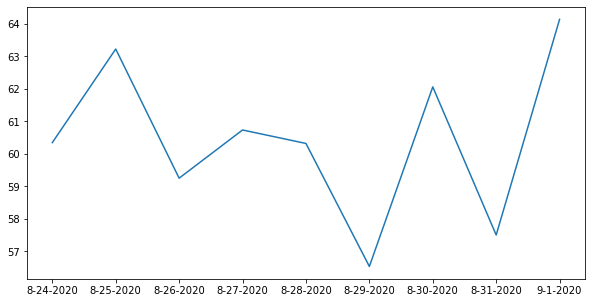

In [66]:
g.collection_date.plot(kind='line', figsize=(10,5))

In [67]:
data_df.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,8-24-2020,Rural,Graduate,"? 50,000 - ? 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,8-24-2020,Urban,12th Pass,"BPL/Below ? 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477
14,15,8-24-2020,Rural,Graduate,"? 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477
16,17,8-24-2020,Rural,Post - Graduation,"BPL/Below ? 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738
18,19,8-24-2020,Rural,Graduate,"? 30,000 - ? 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519


In [73]:
data_df.pivot_table(index='Past_Vote', columns='Vote_Now', aggfunc='count')

CM_satisfaction                                              \
Vote_Now                 AAP AIMIM     BJP  BSP  HAM   INC JAP(L)  JD(U)   
Past_Vote                                                                  
BJP                      7.0   1.0  1577.0  3.0  5.0  42.0  100.0  108.0   
BSP                      NaN   1.0     2.0  5.0  NaN   1.0    NaN    NaN   
Did not vote             8.0   5.0   231.0  2.0  1.0  21.0   41.0   67.0   
HAM                      2.0   NaN    23.0  NaN  1.0   NaN    3.0    2.0   
INC                      NaN   6.0     6.0  NaN  NaN  52.0   10.0    8.0   
JAP(L)                   NaN   NaN     4.0  NaN  NaN   NaN   35.0    NaN   
JD(U)                    6.0  10.0   248.0  2.0  2.0  44.0   72.0  274.0   
LJP                      NaN   NaN    70.0  1.0  NaN   4.0    3.0    6.0   
Left Front               NaN   1.0     2.0  NaN  NaN   1.0    NaN    NaN   
NOTA                     NaN   1.0    29.0  1.0  NaN   9.0    7.0    7.0   
Others                   1.0   5.0    41.0  1.0  1.0   4.0    7.0    4.0   
RJD                      3.0   7.0    45.0  NaN  1.0  30.0   31.0   39.0   
RLSP                     NaN   NaN    16.0  NaN  NaN   NaN    3.0    NaN   
VIP                      NaN   NaN     NaN  NaN  NaN   NaN    NaN    1.0   

                               ... weight                                    \
Vote_Now       LJP Left Front  ...     LJP Left Front   NOTA Others Plurals   
Past_Vote                      ...                                            
BJP           43.0       13.0  ...    43.0       13.0  191.0   32.0    86.0   
BSP            NaN        NaN  ...     NaN        NaN    NaN    NaN     NaN   
Did not vote  10.0       16.0  ...    10.0       16.0   83.0   11.0    51.0   
HAM            2.0        NaN  ...     2.0        NaN    4.0    NaN     NaN   
INC            NaN        3.0  ...     NaN        3.0    6.0    3.0     3.0   
JAP(L)         NaN        NaN  ...     NaN        NaN    NaN    1.0     NaN   
JD(U)         29.0        9.0  ...    29.0        9.0   89.0   15.0    43.0   
LJP            9.0        2.0  ...     9.0        2.0    3.0    NaN     2.0   
Left Front     NaN       17.0  ...     NaN       17.0    1.0    1.0     NaN   
NOTA           3.0        5.0  ...     3.0        5.0   46.0    7.0    11.0   
Others         1.0        4.0  ...     1.0        4.0   10.0    6.0     8.0   
RJD            4.0        8.0  ...     4.0        8.0   18.0    8.0    10.0   
RLSP           NaN        NaN  ...     NaN        NaN    3.0    NaN     2.0   
VIP            NaN        NaN  ...     NaN        NaN    NaN    NaN     NaN   

                                                 
Vote_Now        RJD  RJJP  RLSP Undecided   VIP  
Past_Vote                                        
BJP           366.0  87.0  24.0      60.0  10.0  
BSP             NaN   NaN   NaN       NaN   NaN  
Did not vote  195.0  20.0   3.0      31.0   5.0  
HAM             6.0   4.0   NaN       1.0   NaN  
INC           100.0   NaN   2.0       7.0   NaN  
JAP(L)          2.0   NaN   NaN       NaN   NaN  
JD(U)         429.0  13.0  25.0      34.0   6.0  
LJP            17.0   1.0   NaN       1.0   NaN  
Left Front      4.0   NaN   1.0       NaN   1.0  
NOTA           27.0   5.0   4.0       5.0   NaN  
Others         21.0   7.0   1.0       6.0   NaN  
RJD           801.0   1.0  10.0      14.0   4.0  
RLSP            8.0   1.0  12.0       1.0   1.0  
VIP             NaN   NaN   NaN       NaN   1.0  

[14 rows x 234 columns]

In [74]:
#que 10 Repeat the question 9 and with the cell value and sum of weight
data_df.pivot_table(index='Past_Vote', columns='Vote_Now', aggfunc='sum')

age                                                        \
Vote_Now        AAP  AIMIM      BJP    BSP    HAM     INC  JAP(L)   JD(U)   
Past_Vote                                                                   
BJP           174.0   24.0  49627.0   89.0  166.0  1312.0  2835.0  3381.0   
BSP             NaN   27.0     46.0  121.0    NaN    20.0     NaN     NaN   
Did not vote  211.0  122.0   5443.0   46.0   21.0   514.0   969.0  1587.0   
HAM            48.0    NaN    796.0    NaN   36.0     NaN    89.0    65.0   
INC             NaN  157.0    159.0    NaN    NaN  1607.0   287.0   267.0   
JAP(L)          NaN    NaN    119.0    NaN    NaN     NaN   924.0     NaN   
JD(U)         195.0  274.0   7608.0   75.0   44.0  1320.0  2046.0  8162.0   
LJP             NaN    NaN   2259.0   23.0    NaN   138.0    85.0   161.0   
Left Front      NaN   22.0     71.0    NaN    NaN    26.0     NaN     NaN   
NOTA            NaN   24.0    776.0   20.0    NaN   261.0   194.0   211.0   
Others         26.0  152.0   1199.0   34.0   27.0   144.0   193.0    84.0   
RJD            90.0  245.0   1369.0    NaN   25.0   990.0   877.0  1187.0   
RLSP            NaN    NaN    527.0    NaN    NaN     NaN    81.0     NaN   
VIP             NaN    NaN      NaN    NaN    NaN     NaN     NaN    18.0   

                                 ...    weight                          \
Vote_Now         LJP Left Front  ...        LJP Left Front        NOTA   
Past_Vote                        ...                                     
BJP           1197.0      394.0  ...  44.134673   7.537394  107.652945   
BSP              NaN        NaN  ...        NaN        NaN         NaN   
Did not vote   262.0      351.0  ...  11.801813  13.050113   44.725179   
HAM             86.0        NaN  ...   2.496424        NaN    0.928984   
INC              NaN       93.0  ...        NaN   6.268726    5.999014   
JAP(L)           NaN        NaN  ...        NaN        NaN         NaN   
JD(U)          833.0      264.0  ...  33.148113  11.765603   59.847966   
LJP            259.0       46.0  ...  26.868529   1.712452    0.813171   
Left Front       NaN      533.0  ...        NaN  38.230330    0.201455   
NOTA            71.0      138.0  ...   1.353138   2.863587   35.310377   
Others          23.0       94.0  ...   2.481377   4.017150    9.419087   
RJD            133.0      274.0  ...   9.226178  22.455061   25.113668   
RLSP             NaN        NaN  ...        NaN        NaN    1.097574   
VIP              NaN        NaN  ...        NaN        NaN         NaN   

                                                                      \
Vote_Now         Others    Plurals         RJD       RJJP       RLSP   
Past_Vote                                                              
BJP            8.790137  47.970061  231.226108  15.388533  18.715113   
BSP                 NaN        NaN         NaN        NaN        NaN   
Did not vote   7.289933  25.319524  173.882525   4.349832   5.041587   
HAM                 NaN        NaN    7.713008   1.903148        NaN   
INC            1.552038   1.588527  195.020050        NaN   1.140299   
JAP(L)         3.195682        NaN    2.164824        NaN        NaN   
JD(U)         15.623632  45.175289  627.580739   4.015909  44.376194   
LJP                 NaN   1.927965   30.737989   0.478933        NaN   
Left Front     8.309203        NaN    6.740281        NaN   0.877960   
NOTA          13.594657   3.676105   20.552066   1.116006   4.502676   
Others         8.236678   2.715087   38.194805   1.754671   3.800565   
RJD           14.999222  14.179660  948.173305   0.085758  10.752145   
RLSP                NaN   0.499403   14.951502   0.124556  23.505807   
VIP                 NaN        NaN         NaN        NaN        NaN   

                                    
Vote_Now      Undecided        VIP  
Past_Vote                           
BJP           38.298935  18.691691  
BSP                 NaN        NaN  
Did not vote  22.015457  10.696552  


In [46]:
data_df.head(3)

,collection_date,urban_rural,education,income,vote_now,past_vote,cm_satisfaction,mla_satisfaction,age,gender,assembly_no,category,weight
response_id,,,,,,,,,,,,,
1,8-24-2020,Rural,12th Pass,"? 30,000 - ? 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
2,8-24-2020,Rural,Graduate,"? 20,000 - ? 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
3,8-24-2020,Rural,Graduate,"? 5,000 - ? 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762


In [85]:
data_df.groupby('age_group')

In [89]:
df1=data_df.groupby('age_group').count()
df1

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,
18-25,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094
25-40,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844
40-55,671,671,671,671,671,671,671,671,671,671,671,671,671,671
55+,128,128,128,128,128,128,128,128,128,128,128,128,128,128


In [48]:
data_df.head(1)

,collection_date,urban_rural,education,income,vote_now,past_vote,cm_satisfaction,mla_satisfaction,age,gender,assembly_no,category,weight
response_id,,,,,,,,,,,,,
1,8-24-2020,Rural,12th Pass,"? 30,000 - ? 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969


In [51]:
data_df.vote_now.unique()

array(['BJP', 'RLSP', 'JAP(L)', 'RJD', 'JD(U)', 'Others', 'LJP',
       'Undecided', 'NOTA', 'Plurals', 'INC', 'RJJP', 'BSP', 'AAP',
       'Left Front', 'AIMIM', 'HAM', 'VIP'], dtype=object)

In [53]:
data_jdu=data_df[data_df['vote_now']=='JD(U)']
data_jdu

,collection_date,urban_rural,education,income,vote_now,past_vote,cm_satisfaction,mla_satisfaction,age,gender,assembly_no,category,weight
response_id,,,,,,,,,,,,,
5,8-24-2020,Rural,Graduate,"? 50,000 - ? 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
14,8-24-2020,Urban,Graduate,"? 10,000 - ? 20,000",JD(U),BJP,Somewhat Satisfied,Fully Dissatisfied,29,Male,184,Gen,0.275509
29,8-24-2020,Rural,Graduate,"? 20,000 - ? 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,Male,205,BC,1.337935
30,8-24-2020,Urban,Professional Education,"? 1,50,000 & above",JD(U),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,26,Male,172,BC,0.405708
60,8-24-2020,Rural,12th Pass,"? 5,000 - ? 10,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,48,Male,171,BC,2.824391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,8-31-2020,Rural,12th Pass,"? 80,000 - ? 1,50,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,46,Male,166,BC,3.233006
6788,9-1-2020,Rural,10th Pass,"? 20,000 - ? 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,Male,144,SC,4.741094
6830,9-1-2020,Urban,Graduate,"? 20,000 - ? 30,000",JD(U),JD(U),Fully Satisfied,Somewhat Satisfied,48,Male,146,EBC,6.328899


In [102]:
type(data_jdu)

pandas.core.frame.DataFrame

In [104]:
data_jdu.groupby('age_group').count()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,
18-25,181,181,181,181,181,181,181,181,181,181,181,181,181,181
25-40,264,264,264,264,264,264,264,264,264,264,264,264,264,264
40-55,58,58,58,58,58,58,58,58,58,58,58,58,58,58
55+,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [105]:
#ques 13 join/merge the two dataframes from question 12 and question 11 with the common columns as age_group
df1.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,
18-25,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094
25-40,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844
40-55,671,671,671,671,671,671,671,671,671,671,671,671,671,671
55+,128,128,128,128,128,128,128,128,128,128,128,128,128,128


In [107]:
pd.merge(df1,data_jdu, on='age_group')

,age_group,response_id_x,collection_date_x,urban_rural_x,education_x,income_x,Vote_Now_x,Past_Vote_x,CM_satisfaction_x,MLA_satisfaction_x,...,income_y,Vote_Now_y,Past_Vote_y,CM_satisfaction_y,MLA_satisfaction_y,age_y,gender_y,assembly_no_y,category_y,weight _y
0,18-25,2094,2094,2094,2094,2094,2094,2094,2094,2094,...,"? 50,000 - ? 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
1,18-25,2094,2094,2094,2094,2094,2094,2094,2094,2094,...,"? 5,000 - ? 10,000",JD(U),Did not vote,Somewhat Satisfied,Fully Dissatisfied,24,Male,184,SC,2.427588
2,18-25,2094,2094,2094,2094,2094,2094,2094,2094,2094,...,"? 5,000 - ? 10,000",JD(U),VIP,Fully Satisfied,Fully Satisfied,18,Male,175,BC,0.333505
3,18-25,2094,2094,2094,2094,2094,2094,2094,2094,2094,...,"? 80,000 - ? 1,50,000",JD(U),Did not vote,Fully Satisfied,Cant say,22,Male,171,BC,0.333505
4,18-25,2094,2094,2094,2094,2094,2094,2094,2094,2094,...,"? 10,000 - ? 20,000",JD(U),JD(U),Fully Satisfied,Somewhat Dissatisfied,20,Male,173,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,55+,128,128,128,128,128,128,128,128,128,...,"? 50,000 - ? 80,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,63,Male,62,Gen,4.730010
512,55+,128,128,128,128,128,128,128,128,128,...,"? 20,000 - ? 30,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,57,Male,156,Gen,2.359308
513,55+,128,128,128,128,128,128,128,128,128,...,"? 30,000 - ? 50,000",JD(U),INC,Fully Satisfied,Somewhat Dissatisfied,70,Male,142,BC,1.495606
514,55+,128,128,128,128,128,128,128,128,128,...,"? 50,000 - ? 80,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,55,Male,241,Gen,3.968010
